# House Prices: Advanced Regression Techniques

<p><a name="sections"></a></p>


## Sections

- <a href="#description">Description</a><br>
- <a href="#executive_summary">Executive Summary</a><br>
- <a href="#data_import">Data Import</a><br>
- <a href="#feature_engineering">Feature Engineering</a><br>
- <a href="#data_cleaning_and_eda">Data Cleaning and EDA</a><br>
- <a href="#models">Models</a><br>
    - <a href="#lasso">Lasso</a><br>
    - <a href="#decision_tree">Decision Tree</a><br>
    - <a href="#bagging">Bagging</a><br>
    - <a href="#random_forest">Random Forest</a><br>
    - <a href="#boosting">Boosting</a><br>
    - <a href="#xgboost">XGBoost</a><br>
- <a href="#submission">Submission</a><br>

<p><a name="description"></a></p>

## Description

<p><a name="executive_summary"></a></p>

## Executive Summary

<p><a name="data_import_and_cleaning"></a></p>

## Data Import and Cleaning

**import libaries**

In [861]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_log_error

**read data**

In [862]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [863]:
print('number of training samples: {}'.format(train.shape[0]))
train.head()

number of training samples: 1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [864]:
print('number of testing samples: {}'.format(test.shape[0]))
test.head()

number of testing samples: 1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**remove column id, target = log(1+Sales_Price)**

In [865]:
# set column Id as index
train.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)
# set log of SalePrice as target column
SalePrice = train['SalePrice']
# remove SalePrice from training data
train = train.iloc[:,:-1]
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


**observe that SalePrice is non-normal distribution with skeweness and kurtosis**

skewness: 1.8828757597682129
kurtosis: 6.536281860064529


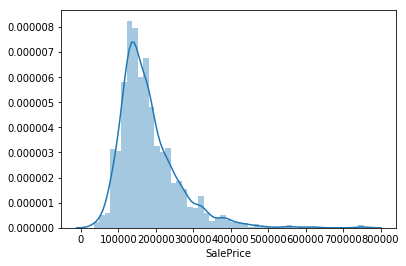

In [866]:
sns.distplot(SalePrice);
#skewness and kurtosis
print('skewness: {}'.format(SalePrice.skew()))
print('kurtosis: {}'.format(SalePrice.kurt()))

**noramlize by log transformation log(1+p)**

skewness: 0.12134661989685333
kurtosis: 0.809519155707878


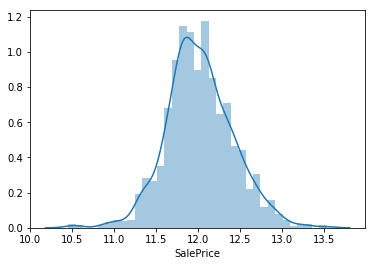

In [867]:
target = np.log1p(SalePrice)
sns.distplot(target);
#skewness and kurtosis
print('skewness: {}'.format(target.skew()))
print('kurtosis: {}'.format(target.kurt()))

**remove outliers from train data:**
Two outliers with around 5,000 sq.ft. and $200,000 price

Text(0, 0.5, 'SalePrice')

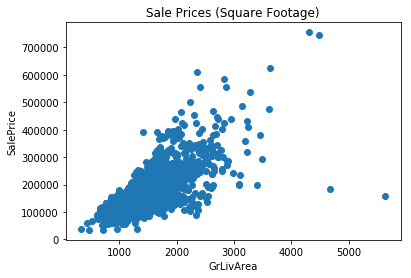

In [868]:
plt.scatter(train['GrLivArea'], SalePrice, marker='o')
plt.title("Sale Prices (Square Footage)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

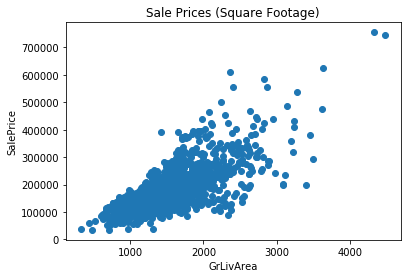

In [869]:
mask = ~((SalePrice < 300000) & (train['GrLivArea']>4000))
train = train[mask]
SalePrice = SalePrice[mask]
target = target[mask]
plt.scatter(train['GrLivArea'], SalePrice, marker='o')
plt.title("Sale Prices (Square Footage)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

**combine train and test data**

In [870]:
data = pd.concat([train,test])
print('total number of training samples: {}'.format(train.shape[0]))
print('total number of samples: {}'.format(data.shape[0]))
data.reset_index(inplace=True)
data.head()

total number of training samples: 1458
total number of samples: 2917


,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Data Cleaning and EDA

**display percentage of NAs**

In [871]:
temp = data.isnull().any()
cols_na = temp[temp==True].index.tolist()
data_na = data.loc[:,cols_na].isnull().astype(int).mean().sort_values(ascending=False)
data_na

PoolQC          0.996915
MiscFeature     0.964004
Alley           0.932122
Fence           0.804251
FireplaceQu     0.486802
LotFrontage     0.166610
GarageFinish    0.054508
GarageYrBlt     0.054508
GarageQual      0.054508
GarageCond      0.054508
GarageType      0.053822
BsmtExposure    0.028111
BsmtCond        0.028111
BsmtQual        0.027768
BsmtFinType2    0.027425
BsmtFinType1    0.027083
MasVnrType      0.008228
MasVnrArea      0.007885
MSZoning        0.001371
BsmtFullBath    0.000686
BsmtHalfBath    0.000686
Utilities       0.000686
Functional      0.000686
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageCars      0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343
dtype: float64

**substitute NAs in categoric variables as None**

In [872]:
# no pool
data['PoolQC'].fillna('None',inplace=True)
# no miscellaneous feature that covered in other categories
data['MiscFeature'].fillna('None',inplace=True)
# no alley
data['Alley'].fillna('None',inplace=True)
# no fence
data['Fence'].fillna('None',inplace=True)
# no fireplace
data['FireplaceQu'].fillna('None',inplace=True)
# fill None for houses with no garage
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    data[col].fillna('None',inplace=True)
# fill None for houses with no basement
for col in ['BsmtFinType2','BsmtExposure','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']:
    data[col].fillna('None',inplace=True)
# None means house does not have Masonry veneer 
data['MasVnrType'].fillna('None',inplace=True)
# fill NAs for numeric columns
# house does not have Masonry veneer so area is zero
data['MasVnrArea'].fillna(0,inplace=True)
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)
# fill NA by median value in the neighborhood
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(),inplace=True)
# NAs from test data
data['MSZoning'] = data.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
# replace by mode
for col in ['BsmtHalfBath','BsmtFullBath','Utilities','Exterior1st','Exterior2nd','SaleType']:
    data[col].fillna(data[col].mode()[0],inplace=True)
# replace by 0
for col in ['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF','GarageCars','GarageArea']:
    data[col].fillna(0,inplace=True)
# replace by typical
data['Functional'].fillna('Typ',inplace=True)
data['KitchenQual'].fillna('TA',inplace=True)

<p><a name="data_cleaning_and_eda"></a></p>

## Feature Engineering

In [873]:
data['GrLivArea_log'] = np.log1p(data['GrLivArea'])
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['TotalSF_log'] = np.log(data['TotalSF'])
data['TotalBsmtSF'] = data['BsmtFinSF1' + data['BsmtFinSF2'] + data['BsmtUnfSF']
data['TotalBsmtSF_log'] = np.log(data['BsmtFinSF1' + data['BsmtFinSF2'] + data['BsmtUnfSF'])

**divide data into numeric and categoric variables**

In [874]:
# numeric data
data_numeric = data._get_numeric_data()
# all columns
cols_all = data.columns.tolist()
# numeric columns
cols_numeric = data_numeric.columns.tolist()
# categoric columns
cols_categoric = list(set(cols_all)-set(cols_numeric))
# categoric data
data_categoric = data.loc[:,cols_categoric]
print('numeric columns: {}'.format(cols_numeric))
print('categoric columns: {}'.format(cols_categoric))

numeric columns: ['index', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GrLivArea_log', 'TotalSF', 'TotalSF_log']
categoric columns: ['CentralAir', 'PavedDrive', 'RoofMatl', 'SaleCondition', 'GarageFinish', 'BsmtQual', 'GarageType', 'Alley', 'MasVnrType', 'Fence', 'Electrical', 'LotConfig', 'BsmtFinType1', 'LandSlope', 'KitchenQual', 'ExterQual', 'Heating', 'Utilities', 'HeatingQC', 'Exterior2nd', 'PoolQC', 'MSZoning', 'Foundation', 'Condition2', 'RoofStyle', 'Exterior1st', 'LandContour', 'Street', 'GarageQual', 'Functional', 'SaleType', 

**encode categoric features, drop duplicates**

In [875]:
# encode categoric variables on entire data
data_categoric_encoded = pd.get_dummies(data_categoric)
# drop duplicates on train data along axis=1
train_categoric_encoded = data_categoric_encoded.iloc[:train.shape[0],:]
train_categoric_encoded = train_categoric_encoded.T.drop_duplicates().T
# find columns
cols = train_categoric_encoded.columns.tolist()
data_categoric_encoded = data_categoric_encoded.loc[:,cols]
data_categoric_encoded.head()

,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,...,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [876]:
# combine numeric columns, encoded categoric columns, encoded NAs in numeric columns
data = pd.concat([data_categoric_encoded,data_numeric],axis=1)
cols = data.columns.tolist()
data.head()

,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GrLivArea_log,TotalSF,TotalSF_log
0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,2,2008,7.444833,2566.0,7.850493
1,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,5,2007,7.141245,2524.0,7.833996
2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,9,2008,7.488294,2706.0,7.903596
3,0,1,0,0,1,1,0,0,0,0,...,272,0,0,0,0,2,2006,7.448916,2473.0,7.813592
4,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,12,2008,7.695758,3343.0,8.114923


**standardize all variables**

In [877]:
data = (data - data.mean())/data.std()
data.head()

,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GrLivArea_log,TotalSF,TotalSF_log
0,-0.268342,0.268342,-0.282742,-0.147339,0.32451,0.120846,-0.018515,-0.018515,-0.018515,-0.089133,...,-0.359678,-0.103349,-0.285992,-0.060437,-0.089608,-1.553066,0.157422,0.570119,0.030059,0.179775
1,-0.268342,0.268342,-0.282742,-0.147339,0.32451,0.120846,-0.018515,-0.018515,-0.018515,-0.089133,...,-0.359678,-0.103349,-0.285992,-0.060437,-0.089608,-0.447307,-0.602844,-0.369466,-0.023713,0.126781
2,-0.268342,0.268342,-0.282742,-0.147339,0.32451,0.120846,-0.018515,-0.018515,-0.018515,-0.089133,...,-0.359678,-0.103349,-0.285992,-0.060437,-0.089608,1.027037,0.157422,0.704626,0.209300,0.350363
3,-0.268342,0.268342,-0.282742,-0.147339,0.32451,0.120846,-0.018515,-0.018515,-0.018515,-0.089133,...,3.872900,-0.103349,-0.285992,-0.060437,-0.089608,-1.553066,-1.363111,0.582755,-0.089008,0.061233
4,-0.268342,0.268342,-0.282742,-0.147339,0.32451,0.120846,-0.018515,-0.018515,-0.018515,-0.089133,...,-0.359678,-0.103349,-0.285992,-0.060437,-0.089608,2.132796,0.157422,1.346715,1.024846,1.029225


**select transformed traning set**

In [878]:
X = data.iloc[:train.shape[0],:]
# save target in series y
y = target
print('number of training samples: {}'.format(X.shape[0]))
X.head()

number of training samples: 1458


,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GrLivArea_log,TotalSF,TotalSF_log
0,-0.268342,0.268342,-0.282742,-0.147339,0.32451,0.120846,-0.018515,-0.018515,-0.018515,-0.089133,...,-0.359678,-0.103349,-0.285992,-0.060437,-0.089608,-1.553066,0.157422,0.570119,0.030059,0.179775
1,-0.268342,0.268342,-0.282742,-0.147339,0.32451,0.120846,-0.018515,-0.018515,-0.018515,-0.089133,...,-0.359678,-0.103349,-0.285992,-0.060437,-0.089608,-0.447307,-0.602844,-0.369466,-0.023713,0.126781
2,-0.268342,0.268342,-0.282742,-0.147339,0.32451,0.120846,-0.018515,-0.018515,-0.018515,-0.089133,...,-0.359678,-0.103349,-0.285992,-0.060437,-0.089608,1.027037,0.157422,0.704626,0.209300,0.350363
3,-0.268342,0.268342,-0.282742,-0.147339,0.32451,0.120846,-0.018515,-0.018515,-0.018515,-0.089133,...,3.872900,-0.103349,-0.285992,-0.060437,-0.089608,-1.553066,-1.363111,0.582755,-0.089008,0.061233
4,-0.268342,0.268342,-0.282742,-0.147339,0.32451,0.120846,-0.018515,-0.018515,-0.018515,-0.089133,...,-0.359678,-0.103349,-0.285992,-0.060437,-0.089608,2.132796,0.157422,1.346715,1.024846,1.029225


<p><a name="models"></a></p>   

## Models 

<p><a name="lasso"></a></p>

## Models: Lasso

In [879]:
repeatedkfold = RepeatedKFold()
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2652124)
lassocv = LassoCV(cv=10,n_alphas=1000)

In [880]:
reg = lassocv.fit(X,y)

No handles with labels found to put in legend.


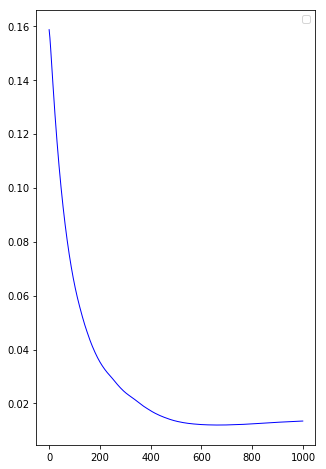

In [881]:
mse_path = np.mean(reg.mse_path_,axis=1)
fig = plt.figure(figsize=(5,8))
plt.plot(mse_path,color='blue',linewidth=1)
plt.legend()
plt.show()

In [882]:
reg.score(X,y)

0.9409257095708456

In [884]:
coefs = pd.Series(reg.coef_.tolist(),index=cols)
coefs = coefs[coefs!=0]
print('numer of coefficients: {}'.format(len(coefs)))
coefs = coefs.sort_values(ascending=False)

numer of coefficients: 114


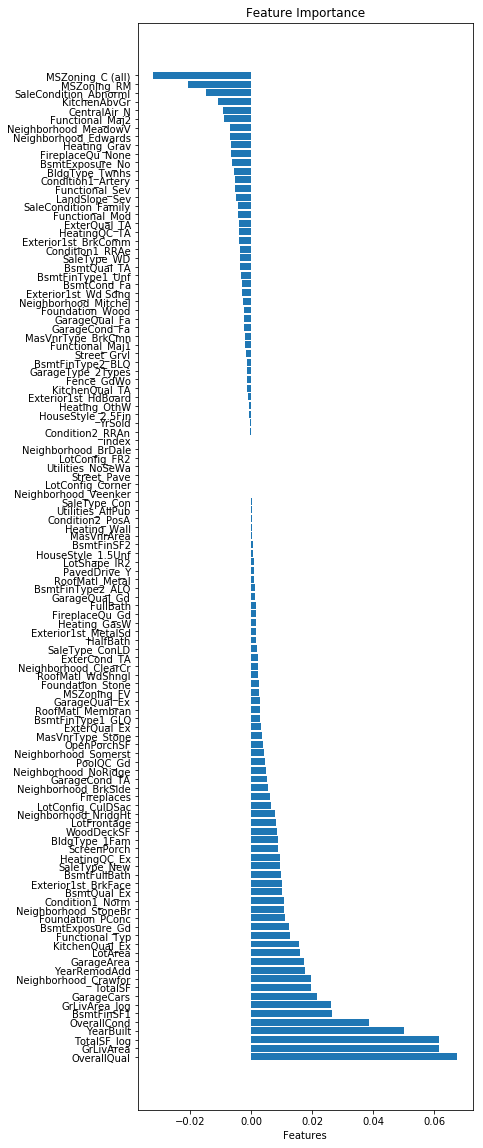

In [885]:
objects = coefs.index.tolist()
y_arange = np.arange(len(objects))
values = coefs.tolist()
fig = plt.figure(figsize=(6,20))
plt.barh(y_arange, values, align='center')
plt.yticks(y_arange, objects)
plt.xlabel('Features')
plt.title('Feature Importance')
plt.show()

In [858]:
# intercept is an average of sale prices
reg.intercept_

12.017621402142833

**estimate sale prices**

In [859]:
y_estimated = lassocv.predict(X)
df_y = pd.DataFrame({'y':y,'y_estimated':y_estimated}).sort_values('y')
df_y.head()

,y,y_estimated
495,10.460271,10.887815
916,10.471978,10.685597
968,10.542733,11.064504
533,10.579005,10.810722
30,10.596660,11.116966


**plot actual and estimated sale prices**

No handles with labels found to put in legend.


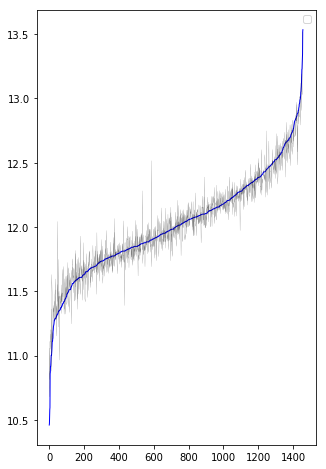

In [831]:
fig = plt.figure(figsize=(5,8))
plt.plot(df_y['y'].tolist(),color='blue',linewidth=1)
plt.plot(df_y['y_estimated'].tolist(),color='black',linewidth=0.1)
plt.legend()
plt.show()

**lasso testing rate with 10-fold cross-validation**

In [860]:
repeatedkfold = RepeatedKFold()
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2652124)
sample = range(0,X.shape[0])
train_score = []
test_score = []
y_train_lst = []
y_train_estimated_lst = []
y_test_lst = []
y_test_estimated_lst = []
iteration = 1
for train_index, test_index in rkf.split(sample):
    print('iteration {}'.format(iteration))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = lassocv.fit(X_train,y_train)
    train_score.append(reg.score(X_train,y_train))
    test_score.append(reg.score(X_test,y_test))
    y_train_lst += y_train.tolist()
    y_test_lst += y_test.tolist()
    y_train_estimated_lst += lassocv.predict(X_train).tolist()
    y_test_estimated_lst += lassocv.predict(X_test).tolist()
    iteration += 1
print('train_score={}'.format(train_score))
print('test_score={}'.format(test_score))

iteration 1


C:\Users\Peter\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<p><a name="submission"></a></p>

## Submission

In [833]:
submission = pd.read_csv("sample_submission.csv")
# test data
X = data.iloc[train.shape[0]:,:]
y = submission['SalePrice']
y_estimated = np.exp(lassocv.predict(X))-1
df = pd.DataFrame({'y':y,'y_estimated':y_estimated})
submission['SalePrice'] = y_estimated
submission.to_csv("submission.csv", index=False)